In [2]:
import numpy as np
from PIL import Image
from PIL import ImageEnhance
import os

data_root = '../data/CephalometricLandmark'
raw_root = data_root + '/RawImage'
txt_root = data_root + '/AnnotationsByMD'
cropped_root = data_root + '/CroppedImage'
contrast_root = data_root + "/ContrastImage"
contrast1_root = data_root + "/ContrastImage1"

In [6]:
# mkdir 
dir_path = data_root + "/GaussianNoise4"
if not os.path.exists(dir_path):
    os.mkdir(dir_path)
    
for i in range(19):
    if not os.path.exists(dir_path + "/%02d" % (i + 1)):
        os.mkdir(dir_path + "/%02d" % (i + 1))


In [3]:

x = [[] for i in range(19)]
y = [[] for i in range(19)]
width = 640
height = 640

for i in range(1, 151):
    txt_filename1 = txt_root + '/400_senior' + "/%03d.txt" % i
    # txt_filename1 = './400_senior' + "/%03d.txt" % i

    with open(txt_filename1, 'r') as f:
        txts = f.read().split()
    for j in range(19):
        x[j].append(int(txts[j].split(',')[0]))
        y[j].append(int(txts[j].split(',')[1]))
for j in range(19):
    minx = np.min(x[j])
    miny = np.min(y[j])
    maxx = np.max(x[j])
    maxy = np.max(y[j])

    print(maxx - minx, maxy - miny)

    x0 = int(minx - (width - (maxx - minx)) / 2)
    x1 = int(maxx + (width - (maxx - minx)) / 2)

    y0 = int(miny - (height - (maxy - miny)) / 2)
    y1 = int(maxy + (height - (maxy - miny)) / 2)

    print(x0, y0)
    print(x1, y1)

    for index in range(1, 151):
        image_path = raw_root + '/TrainingData'
        image_filename = image_path + "/%03d.bmp" % index
        im = Image.open(image_filename)
        region = im.crop((x0, y0, x1, y1))
        region.save(cropped_root + "/%02d/%03d.bmp" % (j + 1, index))

    for index in range(151, 301):
        image_path = raw_root + '/Test1Data'
        image_filename = image_path + "/%03d.bmp" % index
        im = Image.open(image_filename)
        region = im.crop((x0, y0, x1, y1))
        region.save(cropped_root + "/%02d/%03d.bmp" % (j + 1, index))

    for index in range(301, 401):
        image_path = raw_root + '/Test2Data'
        image_filename = image_path + "/%03d.bmp" % index
        im = Image.open(image_filename)
        region = im.crop((x0, y0, x1, y1))
        region.save(cropped_root + "/%02d/%03d.bmp" % (j + 1, index))


238 263
504 697
1144 1337
331 388
1063 606
1703 1246
239 353
948 888
1588 1528
185 173
286 902
926 1542
316 366
1079 1191
1719 1831
450 383
1053 1507
1693 2147
504 437
1048 1661
1688 2301
535 446
993 1729
1633 2369
518 451
1025 1706
1665 2346
318 448
415 1391
1055 2031
372 390
1121 1355
1761 1995
378 398
1138 1388
1778 2028
354 444
1245 1294
1885 1934
429 436
1212 1477
1852 2117
342 422
1170 1152
1810 1792
518 468
1114 1756
1754 2396
247 263
635 1090
1275 1730
293 379
1081 1100
1721 1740
198 229
350 1006
990 1646


In [4]:
from mxnet import image
image_filename = raw_root + '/TrainingData/001.bmp'
print(image.imread(image_filename).shape)


(2400, 1935, 3)


In [5]:
# 图片增广

for i in range(19):
    for j in range(0,400):
        src_file = cropped_root +  "/%02d/%03d.bmp" % (i + 1, j + 1)
        dst_file = contrast1_root + "/%02d/%03d.bmp" % (i + 1, j + 1)
        image = Image.open(src_file)
        enh_con = ImageEnhance.Contrast(image)
        contrast = 0.5
        image_contrasted = enh_con.enhance(contrast)
        image_contrasted.save(dst_file)

KeyboardInterrupt: 

In [5]:
# 图片增广-对比度
import random
contrast_root = data_root + "/ContrastImage1"
for j in range(0,400):
    src_file = cropped_root +  "/16/%03d.bmp" % (j + 1)
    dst_file = contrast_root + "/16/%03d.bmp" % (j + 1)
    image = Image.open(src_file)
    enh_con = ImageEnhance.Contrast(image)
    contrast = 0.5
    image_contrasted = enh_con.enhance(contrast)
    image_contrasted.save(dst_file)

In [10]:
# 图片增广-高斯模糊
import random
from skimage import util, io
from mxnet import image
import mxnet as mx

gaussian_root = data_root + "/GaussianNoise4"
for j in range(0,400):
    src_file = cropped_root +  "/06/%03d.bmp" % (j + 1)
    dst_file = gaussian_root + "/06/%03d.bmp" % (j + 1)
    mx.random.seed(np.random.randint(1, 1000))
    noise = mx.nd.random.normal(0, 1, shape=(640, 640, 1), dtype=np.float32)
    img = image.imread(src_file)
    img = (img.astype('float32') + 10 * noise).clip(0, 255) / 255
    io.imsave(dst_file, img.asnumpy())

/home/charming/miniconda3/envs/gluon/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


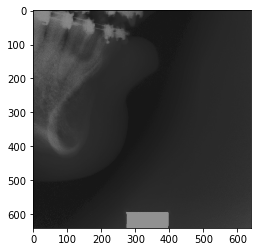

In [9]:
from mxnet import image
import matplotlib.pyplot as plt
gaussian_root = data_root + "/ContrastImage1"

src_file = gaussian_root +  "/16/321.bmp"

img = image.imread(src_file)
plt.imshow(img.asnumpy())
plt.show()